In [1]:
!pip install -r requirements.txt



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter,ExponentialFitter
from lifelines.plotting import plot_lifetimes
import matplotlib.pyplot as plt


In [2]:
# Load the data
data = pd.read_csv('telco.csv')

# Drop the 'ID' column
data.drop('ID', axis=1, inplace=True)

# Convert 'churn' to binary if it's not already
data['churn'] = data['churn'].map({'Yes': 1, 'No': 0})

# Preprocessing
# Identify categorical columns (excluding 'churn')
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True,dtype=int)

In [3]:
X = data.drop('churn', axis=1)
X_with_churn = X.copy()
X_with_churn['churn'] = y
y = data['churn']

# Build AFT models with different distributions
models = {
    'Weibull': WeibullAFTFitter(),
    'LogNormal': LogNormalAFTFitter(),
    'LogLogistic': LogLogisticAFTFitter(),
    'Exponential': ExponentialFitter()
}

for name, model in models.items():
    if name == 'Exponential':
        model.fit(durations=X_with_churn['tenure'], event_observed=X_with_churn['churn'])
    else:
        model.fit(X_with_churn, duration_col='tenure', event_col='churn')
    print(f"{name} Model")
    print(model.print_summary())

Weibull Model


<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-12-02 19:10:16 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

None
LogNormal Model


<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-12-02 19:10:17 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

None
LogLogistic Model


<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-12-02 19:10:17 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

None
Exponential Model


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 129.66       7.83           114.30           145.01

          cmp to     z      p   -log2(p)
lambda_     0.00 16.55 <0.005     202.03
---
AIC = 3215.96

None


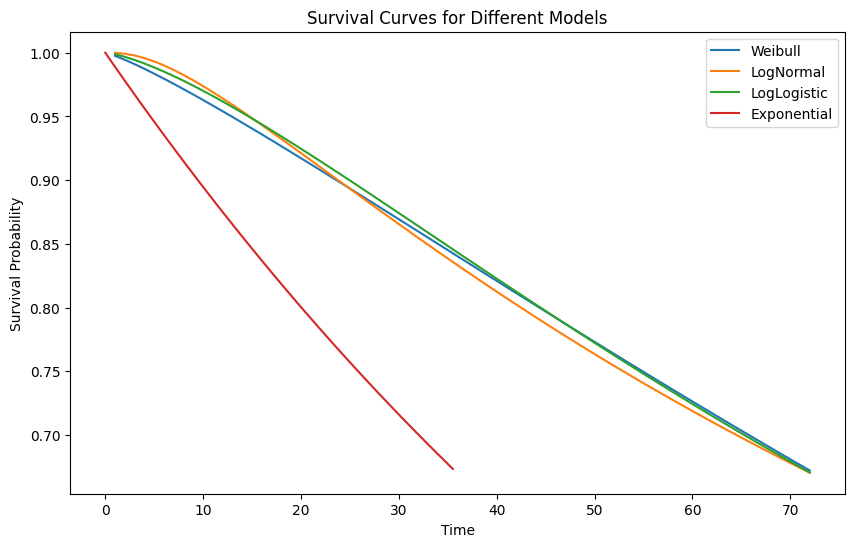

In [4]:
example_covariates = X_with_churn.mean()
example_covariates['age'] = 50 

plt.figure(figsize=(10, 6))
for name, model in models.items():
    if name == 'Exponential':
        lambda_ = 1.0 / model.median_survival_time_
        times = np.linspace(0, example_covariates['tenure'].max(), 100)
        survival_function = np.exp(-lambda_ * times)
        plt.plot(times, survival_function, label=name)
    else:
        survival_function = model.predict_survival_function(example_covariates.to_frame().T)
        plt.plot(survival_function, label=name)

plt.title('Survival Curves for Different Models')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

The plot shows survival probabilities over time for four different statistical models. The Exponential model deviates significantly from the others, suggesting it is less suitable for the data, which is confirmed by its higher AIC and BIC values. The Weibull, LogNormal, and LogLogistic models have almost overlapping curves, indicating similar performance in predicting survival probabilities. However, the LogNormal model is statistically preferred due to its lowest AIC and BIC values, making it the best fit for the data among the models compared. Also based on both the statistical metrics and the plot interpretation, the LogNormal model would be considered the best model for this dataset.

Log Normal Model Summary


<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-12-03 16:39:17 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

None


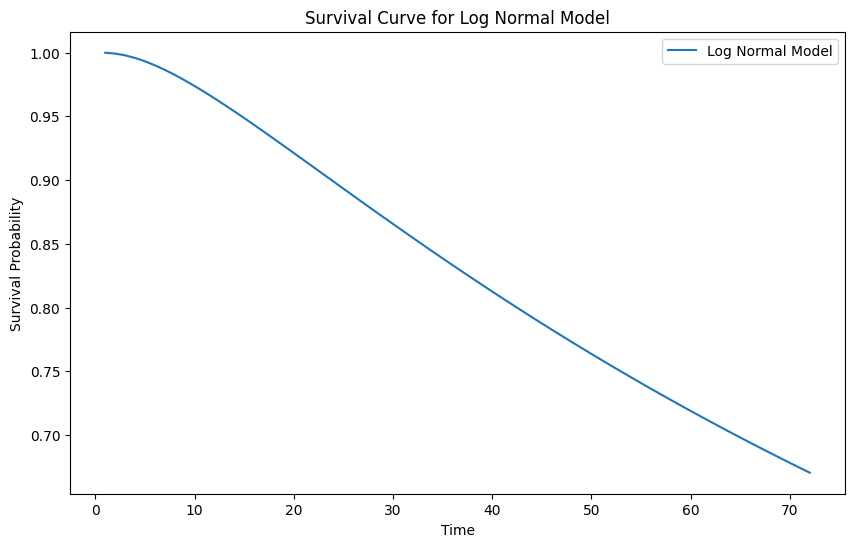

In [8]:
#Final Model
log_normal_model = LogNormalAFTFitter()
log_normal_model.fit(X_with_churn, duration_col='tenure', event_col='churn')

# Print the summary of the model
print("Log Normal Model Summary")
print(log_normal_model.print_summary())


example_covariates = X.mean()
example_covariates['age'] = 50

plt.figure(figsize=(10, 6))
survival_function = log_normal_model.predict_survival_function(example_covariates.to_frame().T)
plt.plot(survival_function, label='Log Normal Model')

plt.title('Survival Curve for Log Normal Model')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

# Customer Lifetime Value

In [11]:
# Assuming original_data is your non-dummified DataFrame
# and data is your dummified DataFrame used for model fitting

# Predict survival function for each customer using dummified data
predicted_survival = log_normal_model.predict_survival_function(data.drop('churn', axis=1))

# Calculate CLV using dummified data
average_revenue_per_period = 100  # Adjust based on your data
clv_per_customer = (predicted_survival * average_revenue_per_period).sum(axis=0)

original_data = pd.read_csv('telco.csv')
# Add CLV to the original data for segmentation analysis
original_data['CLV'] = clv_per_customer.values

# Identify valuable segments using original data
# Example: Grouping by a segment, e.g., 'region'
average_clv_per_segment = original_data.groupby('region')['CLV'].mean()

# Display average CLV per segment
print(average_clv_per_segment)


region
Zone 1    5314.180369
Zone 2    5270.713413
Zone 3    5304.558046
Name: CLV, dtype: float64


In [18]:
# Calculate CLV for each customer
predicted_survival = log_normal_model.predict_survival_function(data.drop('churn', axis=1))
average_revenue_per_period = 100  # Adjust based on your data
clv_per_customer = (predicted_survival * average_revenue_per_period).sum(axis=0)

# Add CLV to the original data for segmentation analysis
original_data['CLV'] = clv_per_customer.values

# Define segments
segments = ['region', 'marital', 'ed', 'retire', 'gender', 'custcat']

# Calculate average CLV for each segment
segment_clv = {}
for segment in segments:
    segment_clv[segment] = original_data.groupby(segment)['CLV'].mean()

# Display average CLV per segment
for segment, clv_values in segment_clv.items():
    print(f"Average CLV for {segment}:")
    print(clv_values, "\n")

Average CLV for region:
region
Zone 1    5314.180369
Zone 2    5270.713413
Zone 3    5304.558046
Name: CLV, dtype: float64 

Average CLV for marital:
marital
Married      5624.863336
Unmarried    4974.346486
Name: CLV, dtype: float64 

Average CLV for ed:
ed
College degree                  4676.768877
Did not complete high school    5943.832992
High school degree              5520.100734
Post-undergraduate degree       4657.346105
Some college                    5252.596775
Name: CLV, dtype: float64 

Average CLV for retire:
retire
No     5224.545493
Yes    6752.350477
Name: CLV, dtype: float64 

Average CLV for gender:
gender
Female    5268.048334
Male      5326.648733
Name: CLV, dtype: float64 

Average CLV for custcat:
custcat
Basic service    4411.148273
E-service        5763.449743
Plus service     6073.146518
Total service    4939.678477
Name: CLV, dtype: float64 



In [19]:
# Identify top 20% at-risk subscribers
at_risk_threshold = predicted_survival.loc[12].quantile(0.20)
at_risk_subscribers = predicted_survival.loc[12][predicted_survival.loc[12] <= at_risk_threshold]

# Calculate the retention budget based on the average CLV of these at-risk subscribers
average_clv_at_risk = original_data.loc[at_risk_subscribers.index, 'CLV'].mean()
annual_retention_budget = len(at_risk_subscribers) * average_clv_at_risk

print("Annual Retention Budget:", annual_retention_budget)


Annual Retention Budget: 630392.7239289978


### Interpretation of Coefficients

- **Positive Coefficients**: Indicate longer customer lifetime. Key variables include:
  - `address` and `age`: Suggesting that stability and older age reduce churn.
  - `custcat_E-service`, `Plus service`, `Total service`: Higher engagement in services leads to lower churn.

- **Negative Coefficients**: Indicate higher churn risk. Notable variables are:
  - `internet_Yes`, `marital_Unmarried`, `forward_Yes`, `voice_Yes`: Usage of specific services and unmarried status increase churn risk.

- **Education and Income**: Mixed impact on churn. Lower education levels unexpectedly correlate with higher lifetime value, while income has a neutral effect.

### Most Valuable Segments

- **Marital Status**: Married customers show higher value.
- **Retirement Status**: Retired customers have a higher CLV.
- **Customer Category**: 'Plus service' category customers are more valuable.

### Retention Strategy Suggestions

- **Targeted Communication**: Focus on married and retired customers with personalized communication.
- **Service Upgrades**: Promote upgrades to 'Plus service' for customers in basic categories.
- **Loyalty Programs**: Implement loyalty programs for high-value segments.
- **Customer Feedback**: Engage with customers using internet and voice services to understand and meet their needs.